In [34]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt


In [35]:
batch_size = 64
num_classes = 10
epochs = 12

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
938/938 - 11s - 12ms/step - accuracy: 0.8750 - loss: 0.4235 - val_accuracy: 0.9580 - val_loss: 0.1397
Epoch 2/12
938/938 - 11s - 12ms/step - accuracy: 0.9627 - loss: 0.1241 - val_accuracy: 0.9714 - val_loss: 0.0924
Epoch 3/12
938/938 - 11s - 12ms/step - accuracy: 0.9728 - loss: 0.0921 - val_accuracy: 0.9775 - val_loss: 0.0723
Epoch 4/12
938/938 - 11s - 11ms/step - accuracy: 0.9776 - loss: 0.0753 - val_accuracy: 0.9791 - val_loss: 0.0621
Epoch 5/12
938/938 - 11s - 12ms/step - accuracy: 0.9804 - loss: 0.0645 - val_accuracy: 0.9849 - val_loss: 0.0490
Epoch 6/12
938/938 - 21s - 22ms/step - accuracy: 0.9826 - loss: 0.0571 - val_accuracy: 0.9792 - val_loss: 0.0644
Epoch 7/12
938/938 - 11s - 12ms/step - accuracy: 0.9841 - loss: 0.0514 - val_accuracy: 0.9854 - val_loss: 0.0473
Epoch 8/12
938/938 - 11s - 12ms/step - accuracy: 0.9857 - loss: 0.0470 - val_accuracy: 0.9867 - val_loss: 0.0388
Epoch 9/12
938/938 - 11

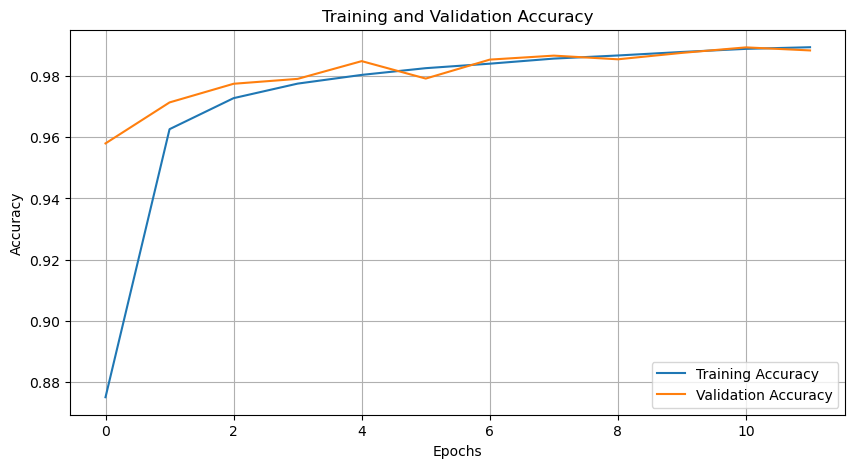

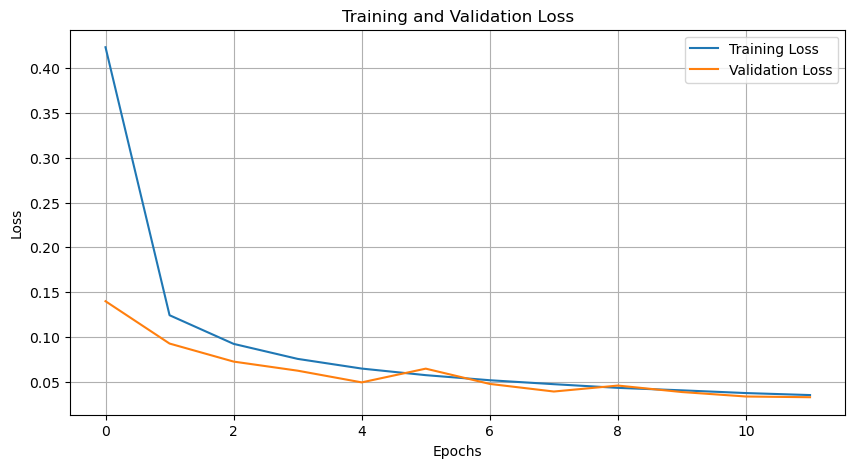

In [36]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data('/home/mnist.npz')

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, epsilon=1e-07, decay=0.0),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plotting training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()